# Практика pandas
Доброго времени!  

Я позаимствовал этот ноутбук с одного из курсов по аналитке данных в ВШЭ, потому что она находится в открытом доступе на гитхабе (а еще, потому что он очень хороший и заставляет всё вспомнить, закрепить, освоить заново, очень сильно пострадать...)

Если справиться с этим заданием, то дальше станет легче жить!

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices.head() 

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [3]:
df_prices.dtypes

Date     object
A       float64
AAL     float64
AAP     float64
AAPL    float64
         ...   
ZBRA    float64
ZION    float64
ZM      float64
ZS      float64
ZTS     float64
Length: 521, dtype: object

In [4]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [5]:
# your code here
# (♡-_-♡)
df_prices['Date'] = pd.to_datetime(df_prices['Date'], format="%Y-%m-%d")
df_prices = df_prices.set_index('Date')
df_prices.head(2)

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493


__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [6]:
# your code here
# ヽ(♡‿♡)ノ
df_inf[['S&P-500', 'NASDAQ', 'DJI']].sum()

S&P-500    505
NASDAQ     103
DJI         30
dtype: int64

Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
# БООЛЕЕ DUMB WAY
(df_inf['S&P-500'] & df_inf['NASDAQ'] & df_inf['DJI']).sum()

5

In [8]:
# your code here
# (´｡• ᵕ •｡`)
df_inf[['S&P-500', 'NASDAQ', 'DJI']].all(axis=1).sum()

5

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [9]:
# your code here
# (◕‿◕)♡
df_inf[(df_inf['S&P-500']) & (df_inf['Founded'].between(1800, 1900, inclusive='left'))].shape[0]

95

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [10]:
# your code here
# (♡ﾟ▽ﾟ♡) 
df_inf['GICS Sector'].nunique()

11

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [11]:
# your code here
# ♡ (´｡• ω •｡`) ♡
len(set(df_prices.columns) - set(df_inf['Symbol']))

58

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [12]:
top3sectors = df_inf['GICS Sector'].value_counts().head(3).index
df_inf[df_inf['GICS Sector'].isin(top3sectors)]['S&P-500'].sum()

210

In [13]:
# your code here
# (⌒_⌒;)


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__

In [14]:
df_5 = df_prices.sample(n=5, axis=1, random_state=9122023)
df_5.head()

,KMX,DUK,LNC,DE,VRSK
Date,,,,,
2013-03-05,40.240002,46.038567,24.341887,73.517792,57.779552
2013-03-06,40.650002,45.854836,24.672962,72.832481,57.799026
2013-03-07,40.910000,45.638279,24.933092,73.240410,57.828247
2013-03-08,41.410000,45.697334,26.013027,74.146004,58.159428
2013-03-11,41.369999,45.795769,26.123386,74.602913,58.286049


<Axes: xlabel='Date'>

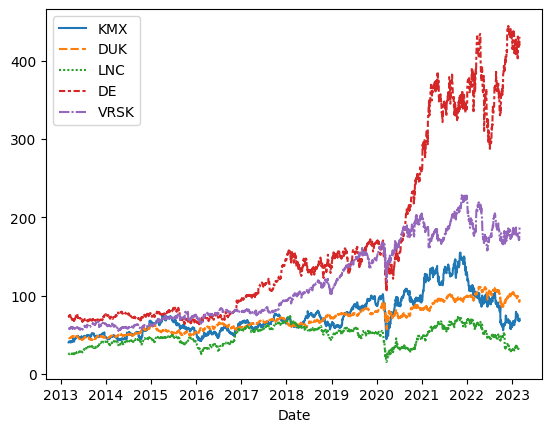

In [15]:
# your code here
# (＠_＠)
sns.lineplot(df_5)

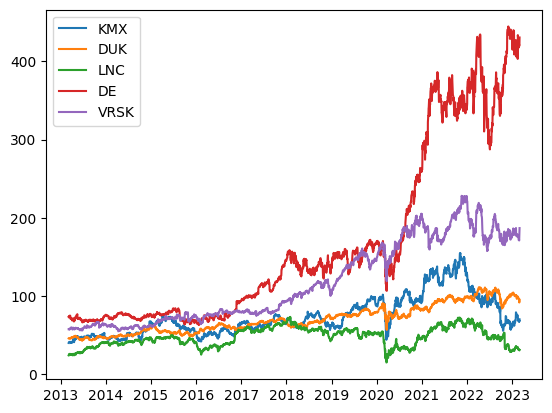

In [16]:
x = df_5.index
for col in df_5.columns:
    y = df_5[col].values
    plt.plot(x, y, label=col)

plt.legend()
plt.show()

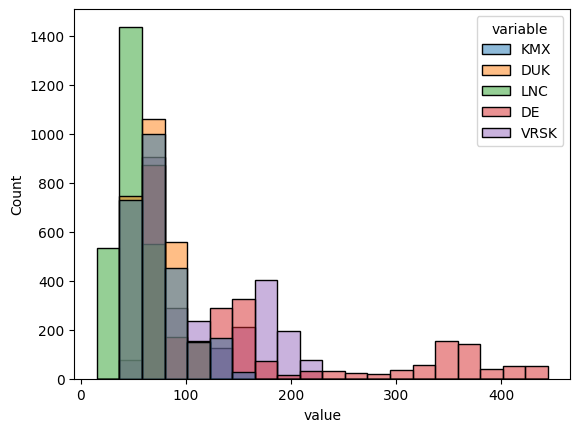

In [17]:
sns.histplot(data=df_5.reset_index().melt(id_vars='Date'), x='value', hue='variable', common_norm=False, bins=20)
plt.show()

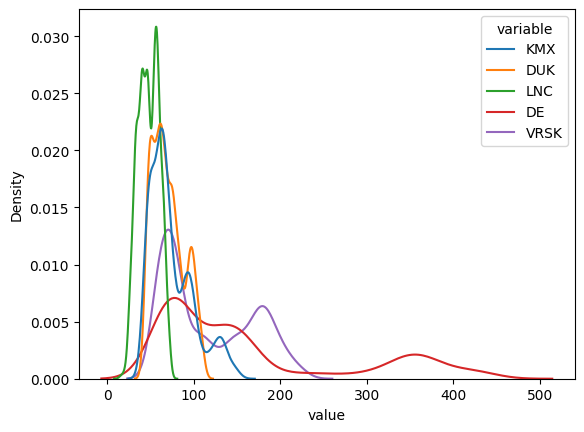

In [18]:
sns.kdeplot(data=df_5.reset_index().melt(id_vars='Date'), x='value', hue='variable', common_norm=False)
plt.show()

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [19]:
df_inf[['Symbol', 'GICS Sector']].set_index('Symbol')

,GICS Sector
Symbol,
A,Health Care
AAL,Industrials
AAP,Consumer Discretionary
AAPL,Information Technology
ABBV,Health Care
...,...
ZBH,Health Care
ZBRA,Information Technology
ZION,Financials


In [20]:
(
    df_prices[df_prices.index.year == 2022]
    .median()
    .to_frame()
    .rename({0:'MEDIAN_PRICE'}, axis=1)
    .join(
        df_inf[['Symbol', 'GICS Sector']]
        .set_index('Symbol')
    )
    .groupby('GICS Sector')
    ['MEDIAN_PRICE']
    .quantile(0.95)
    .sort_values()
    .to_frame()
)

,MEDIAN_PRICE
GICS Sector,
Utilities,140.414839
Energy,159.902217
Consumer Staples,246.914078
Communication Services,260.027003
Materials,284.315181
Real Estate,316.791876
Financials,354.431122
Information Technology,419.005197
Industrials,427.725174


In [21]:
# your code here
# (￢_￢) 


## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [22]:
dohod = (df_prices - df_prices.shift(1)) / df_prices.shift(1)
dohod.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640


In [23]:
dohod = (df_prices.diff(1) / df_prices.shift(1)).iloc[1:]
dohod.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533


In [24]:
# your code here
# (⊙_⊙)


Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ ваш текст

In [25]:
df_5_dohod = dohod.sample(n=5, axis=1, random_state=9122023)
df_5_dohod.head()

,KMX,DUK,LNC,DE,VRSK
Date,,,,,
2013-03-06,0.010189,-0.003991,0.013601,-0.009322,0.000337
2013-03-07,0.006396,-0.004723,0.010543,0.005601,0.000506
2013-03-08,0.012222,0.001294,0.043313,0.012365,0.005727
2013-03-11,-0.000966,0.002154,0.004242,0.006162,0.002177
2013-03-12,-0.003626,-0.003582,-0.004225,-0.006452,-0.019051


In [26]:
# your code here
# =^･ｪ･^=


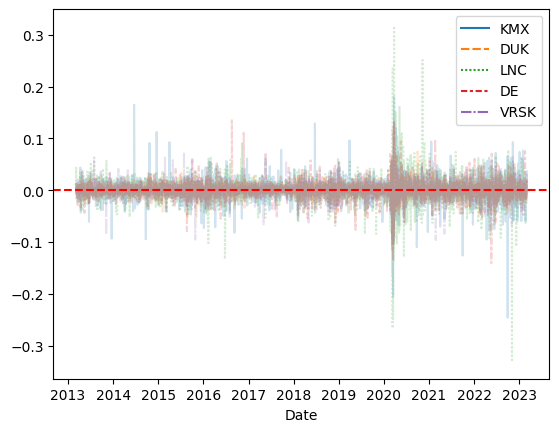

In [27]:
sns.lineplot(df_5_dohod, alpha=0.2)
plt.axhline(0, linestyle='--', c='red')

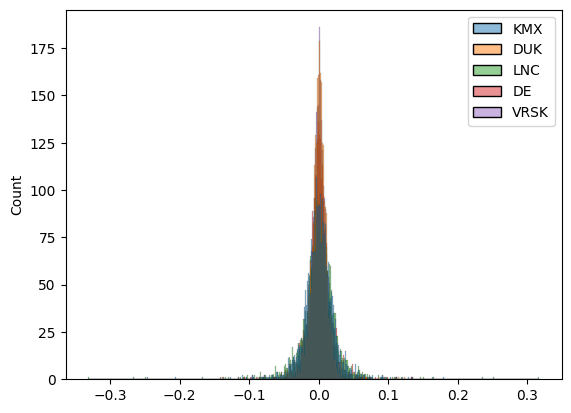

In [28]:
sns.histplot(df_5_dohod)
plt.show()

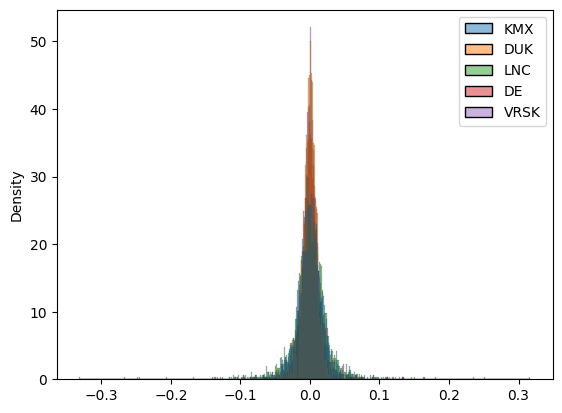

In [29]:
sns.histplot(df_5_dohod, stat='density', common_norm=False)
plt.show()

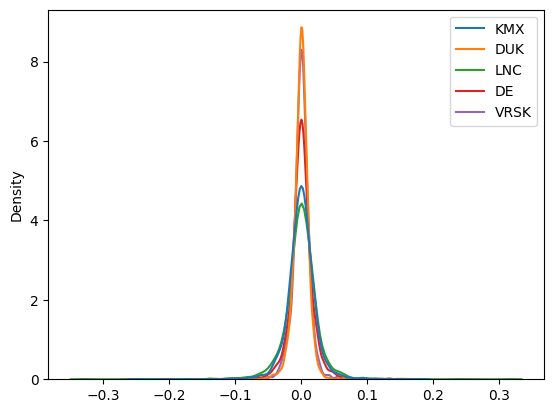

In [30]:
sns.kdeplot(df_5_dohod)
plt.show()

<Axes: >

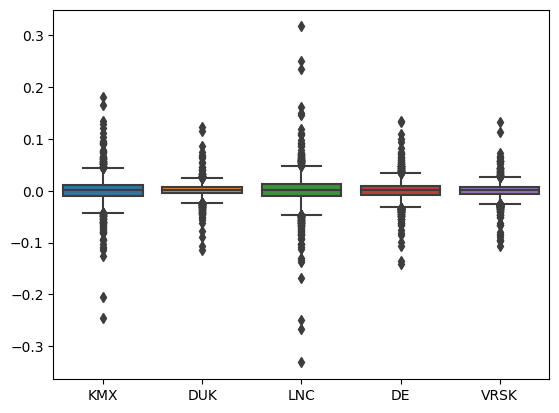

In [31]:
sns.boxplot(df_5_dohod)

<Axes: >

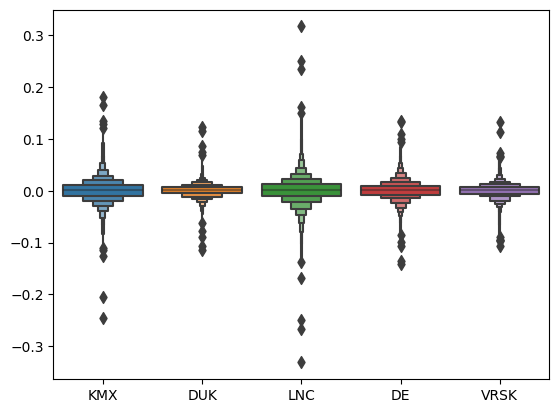

In [32]:
sns.boxenplot(df_5_dohod)

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

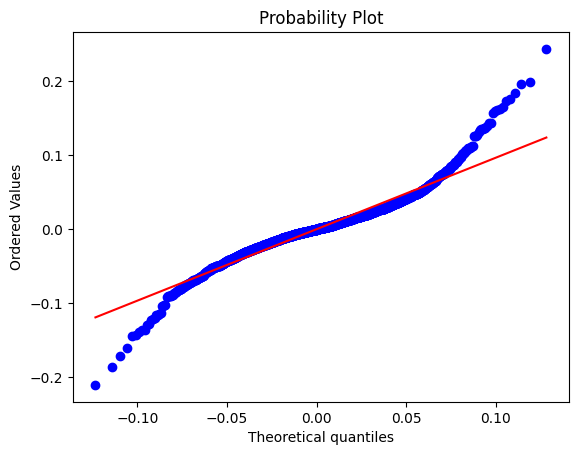

In [34]:
ax = plt.subplot(111)
x = dohod['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [35]:
dohod_train = dohod[dohod.index.year <= 2016]
dohod_test = dohod[dohod.index.year == 2017]

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [36]:
top10 = dohod_train.mean().nlargest(10)
top10

LW      0.006721
CZR     0.002659
NVDA    0.002480
TSLA    0.002324
AMD     0.002293
PAYC    0.002058
NFLX    0.002040
INCY    0.002019
AVGO    0.001989
FANG    0.001836
dtype: float64

In [37]:
bot10 = dohod_train.mean().nsmallest(10)
bot10

ETSY   -0.001280
RL     -0.000460
MOS    -0.000391
NRG    -0.000313
ENPH   -0.000259
SEDG   -0.000258
KMI    -0.000235
WBD    -0.000214
NWSA   -0.000202
NWS    -0.000162
dtype: float64

In [38]:
# your code here
# C (・_・)ノ



In [39]:
# 'TSLA' в самым доходных
'TSLA' in top10

True

Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [40]:
top10std = dohod_train.std().nlargest(10)
top10std

ENPH    0.052201
SEDG    0.042527
ETSY    0.041826
AMD     0.038266
FCX     0.036348
TEAM    0.035173
VRTX    0.034165
FSLR    0.033590
WMB     0.032808
TSLA    0.031758
dtype: float64

In [41]:
bot10std = dohod_train.std().nsmallest(10)
bot10std

PEP     0.008767
ACGL    0.008883
WM      0.009028
RSG     0.009070
JNJ     0.009142
PG      0.009209
KO      0.009257
T       0.009405
SO      0.009429
MMC     0.009560
dtype: float64

In [42]:
# your code here
# ٩(ˊ〇ˋ*)و


In [43]:
# 'TSLA' в самым рискованных
'TSLA' in top10std

True

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [44]:
df_result = dohod_train.agg([np.mean, np.std]).T
df_result.head()

,mean,std
A,0.000559,0.014204
AAL,0.001543,0.023315
AAP,0.000968,0.017105
AAPL,0.000852,0.015194
ABBV,0.000814,0.017230


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ ваш текст

In [45]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'blablabla')

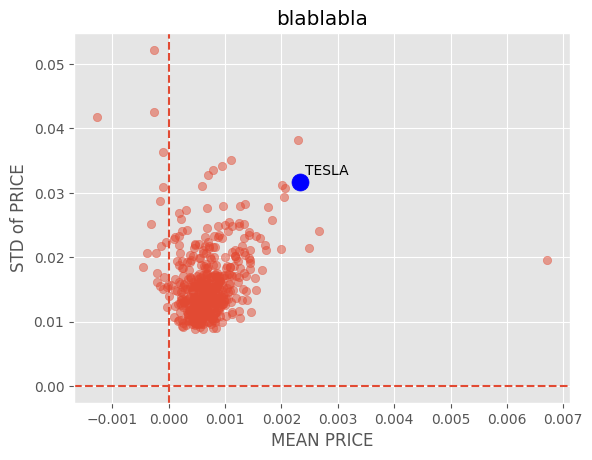

In [46]:
plt.scatter(df_result['mean'], df_result['std'], alpha=0.5)
plt.scatter(df_result.loc['TSLA']['mean'], df_result.loc['TSLA']['std'], color='blue', s=150, label='TESLA')
plt.text(df_result.loc['TSLA']['mean']+0.0001, df_result.loc['TSLA']['std']+0.001, 'TESLA')
# plt.legend()

plt.axvline(0, linestyle='--')
plt.axhline(0, linestyle='--')

plt.xlabel('MEAN PRICE')
plt.ylabel('STD of PRICE')
plt.title('blablabla')


In [47]:
# your code here
# (っ˘ڡ˘ς) 


Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [51]:
VaR = dohod_train.quantile(0.05).sort_values(ascending=False)
VaR.head(10) # наименее рискованные

ACGL   -0.012580
WM     -0.013254
AMCR   -0.013328
PEP    -0.013530
PG     -0.013543
MCD    -0.013787
UPS    -0.013866
MO     -0.014091
RSG    -0.014325
T      -0.014334
Name: 0.05, dtype: float64

In [52]:
VaR.dropna().tail(10) # самые рискованные

PAYC   -0.044134
TSLA   -0.045445
MRO    -0.046294
TEAM   -0.046401
QRVO   -0.047253
AMD    -0.051054
FCX    -0.055248
ETSY   -0.058133
SEDG   -0.063843
ENPH   -0.075272
Name: 0.05, dtype: float64

In [53]:
VaR = VaR * -1

In [54]:
# добавим получившиеся значения в нашу таблицу
VaR.name = 'VaR'
df_result = df_result.join(VaR)
df_result.head()

,mean,std,VaR
A,0.000559,0.014204,0.023112
AAL,0.001543,0.023315,0.035827
AAP,0.000968,0.017105,0.020965
AAPL,0.000852,0.015194,0.023554
ABBV,0.000814,0.017230,0.027337


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

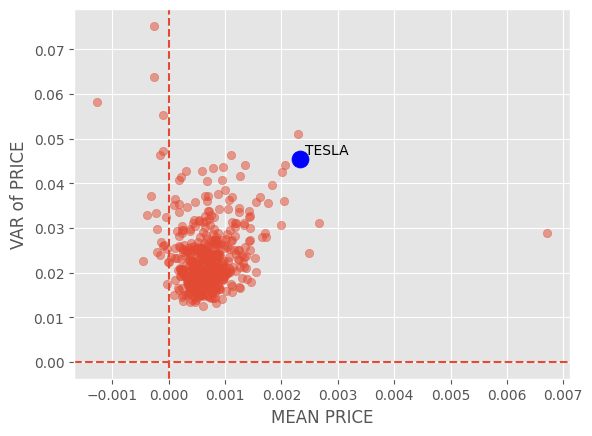

In [58]:
plt.scatter(df_result['mean'], df_result['VaR'], alpha=0.5) # поменяли меру риска на VaR
plt.scatter(df_result.loc['TSLA']['mean'], df_result.loc['TSLA']['VaR'], color='blue', s=150, label='TESLA') # поменяли меру риска на VaR
plt.text(df_result.loc['TSLA']['mean']+0.0001, df_result.loc['TSLA']['VaR']+0.001, 'TESLA') # поменяли меру риска на VaR
# plt.legend()

plt.axvline(0, linestyle='--')
plt.axhline(0, linestyle='--')

plt.xlabel('MEAN PRICE')
plt.ylabel('VAR of PRICE')
plt.show()


$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [59]:
ES = dohod_train[dohod_train < dohod_train.quantile(0.05)].mean()
ES.head()

A      -0.032238
AAL    -0.050908
AAP    -0.032122
AAPL   -0.033973
ABBV   -0.039478
dtype: float64

In [60]:
ES['TSLA'] # ES для Теслы.

-0.06493077477607273

In [62]:
1000 * (ES['TSLA']) * -1   # в среднем потеряем при покупке TSLA в один из самых неудачных дней

64.93077477607272

In [63]:
# в среднем потеряем при покупке TSLA в худшие времена

In [65]:
1000 * (dohod_train['TSLA'][dohod_train['TSLA'] > dohod_train['TSLA'].quantile(0.95)].mean()) 
# в среднем заработаем при покупке TSLA в один из 5% лучших дней

82.17109481733716

Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [67]:
ES = ES * -1
ES.head()

A       0.032238
AAL     0.050908
AAP     0.032122
AAPL    0.033973
ABBV    0.039478
dtype: float64

In [68]:
ES.name = 'ES'
df_result = df_result.join(ES)
df_result.head()

,mean,std,VaR,ES
A,0.000559,0.014204,0.023112,0.032238
AAL,0.001543,0.023315,0.035827,0.050908
AAP,0.000968,0.017105,0.020965,0.032122
AAPL,0.000852,0.015194,0.023554,0.033973
ABBV,0.000814,0.017230,0.027337,0.039478


In [69]:
df_result = df_result.round(3)
df_result = df_result.sort_values(by='ES', ascending=False)
df_result.head()

,mean,std,VaR,ES
ENPH,-0.000,0.052,0.075,0.112
ETSY,-0.001,0.042,0.058,0.098
SEDG,-0.000,0.043,0.064,0.091
FCX,-0.000,0.036,0.055,0.084
TRGP,0.001,0.031,0.043,0.080


In [70]:
df_result = df_result.reset_index()
df_result

,index,mean,std,VaR,ES
0,ENPH,-0.000,0.052,0.075,0.112
1,ETSY,-0.001,0.042,0.058,0.098
2,SEDG,-0.000,0.043,0.064,0.091
3,FCX,-0.000,0.036,0.055,0.084
4,TRGP,0.001,0.031,0.043,0.080
...,...,...,...,...,...
515,PDD,NaN,NaN,NaN,NaN
516,RIVN,NaN,NaN,NaN,NaN
517,VICI,NaN,NaN,NaN,NaN
518,ZM,NaN,NaN,NaN,NaN


In [71]:
df_result = df_result.rename(columns={'index': 'Ticker'})
df_result

,Ticker,mean,std,VaR,ES
0,ENPH,-0.000,0.052,0.075,0.112
1,ETSY,-0.001,0.042,0.058,0.098
2,SEDG,-0.000,0.043,0.064,0.091
3,FCX,-0.000,0.036,0.055,0.084
4,TRGP,0.001,0.031,0.043,0.080
...,...,...,...,...,...
515,PDD,NaN,NaN,NaN,NaN
516,RIVN,NaN,NaN,NaN,NaN
517,VICI,NaN,NaN,NaN,NaN
518,ZM,NaN,NaN,NaN,NaN


In [72]:
df_result.to_csv('var_result.csv', sep=',', index=False)

1. Округлите данные до 3-х знаков после запятой `df_result.round(3)`
2. Отсортируйте таблицу `df_result` по колонке `ES` по убыванию
3. Запишите получившиеся результаты в таблицу с колонками `'Ticker', 'std', 'r', 'VaR', 'ES'` в файл `var_result` Таблица должна быть без индексов. Колонки друг от друга отделяются запятыми. Порядок колонок должен быть именно таким.
4. Сохраните в файлик.

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [74]:
var_tsla = dohod_train['TSLA'].quantile(0.05)
df_tsla = dohod_test['TSLA'].reset_index()
df_tsla['is_bad'] = (dohod_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.0199203187250996

Нарисуем VaR-кривую.

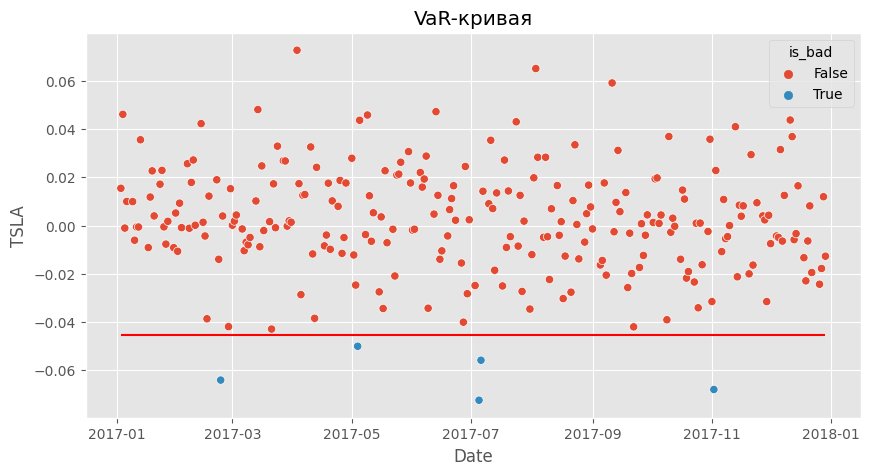

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

Будет правильнее расширять обучающую выборку, то есть учитывать новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [76]:
N = dohod_train.shape[0]
print(N)

965


**Оставим данные до 2017 года**

In [85]:
VaR2 = dohod[dohod.index.year <= 2017]['TSLA'].rolling(window=N).quantile(0.05).shift(1) # shift, т. к. квантиль для первых 2265 дней - это VaR для 2266-го дня.
print(VaR2.iloc[2260:2280, ])

Series([], Name: TSLA, dtype: float64)


In [86]:
VaR2 = VaR2.dropna() # оставляем только test
VaR2

Date
2017-01-03   -0.045445
2017-01-04   -0.045445
2017-01-05   -0.045445
2017-01-06   -0.045445
2017-01-09   -0.045445
                ...   
2017-12-22   -0.039632
2017-12-26   -0.039632
2017-12-27   -0.039632
2017-12-28   -0.039632
2017-12-29   -0.039632
Name: TSLA, Length: 251, dtype: float64

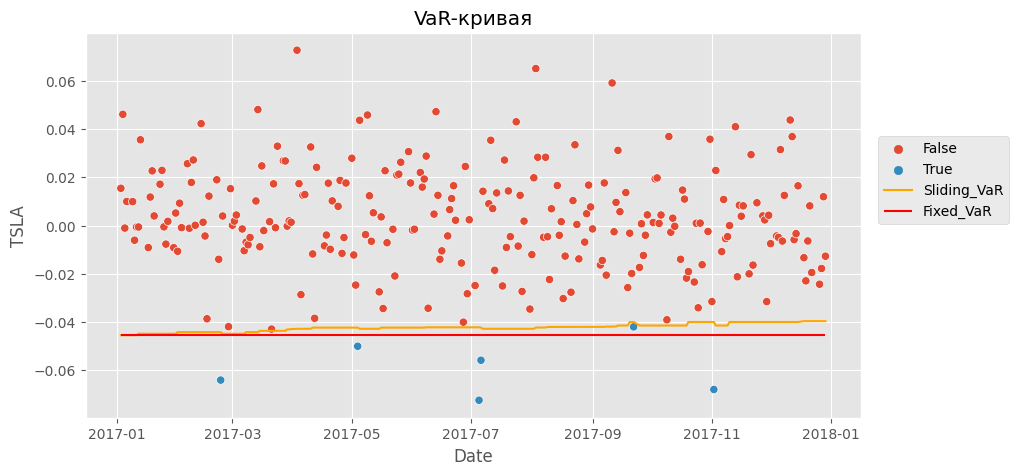

In [87]:
df_tsla = dohod_test['TSLA'].reset_index()
df_tsla['is_bad'] = (dohod_test['TSLA'].values < VaR2.values)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.plot(VaR2.index, VaR2.values, color='orange', label='Sliding_VaR')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red', label='Fixed_VaR')
plt.legend(bbox_to_anchor=(1.2, 0.75))
plt.title('VaR-кривая');

In [89]:
df_tsla['is_bad'] = (dohod_test['TSLA'].values < VaR2.values)
df_tsla['is_bad'].mean()

0.02390438247011952

In [91]:
# Теперь на тестовой выборке мы пробили для Теслы VaR в 2.4% случаев

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

In [ ]:
# your code here
# [✖‿✖]

  ---------